# **Big mart sale prediction using Gradient Boosting and SVM**

# **Importing Library and dataset loading**

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('train (1).csv')

In [7]:
# checking the first 5 rows of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# checking the last 5 rows of the dataset
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# **Exploratory Data Analysis (EDA)**

In [9]:
# checking the shape of the dataset
df.shape

(8523, 12)

**There are 8523 rows and 12 columns in our dataset**

In [10]:
# checking the columns of the dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
# data type of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**There are 4 columns with float data type and 1 integer data type and 7 object data type columns present in our data**

In [13]:
# checking the number of missing values in each column
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

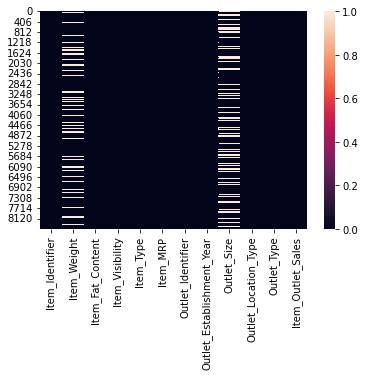

In [14]:
# plot the missing values in each column
sns.heatmap(df.isnull())

In [15]:
# description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


<AxesSubplot:>

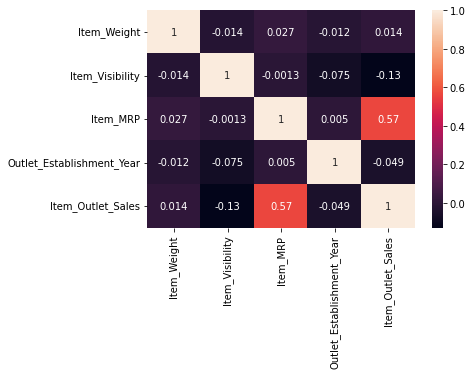

In [16]:
# heat map of the data set 
sns.heatmap(df.corr(),annot=True)

In [17]:
# correlatoin of the dataset
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [18]:
# checking the number of unique values in each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

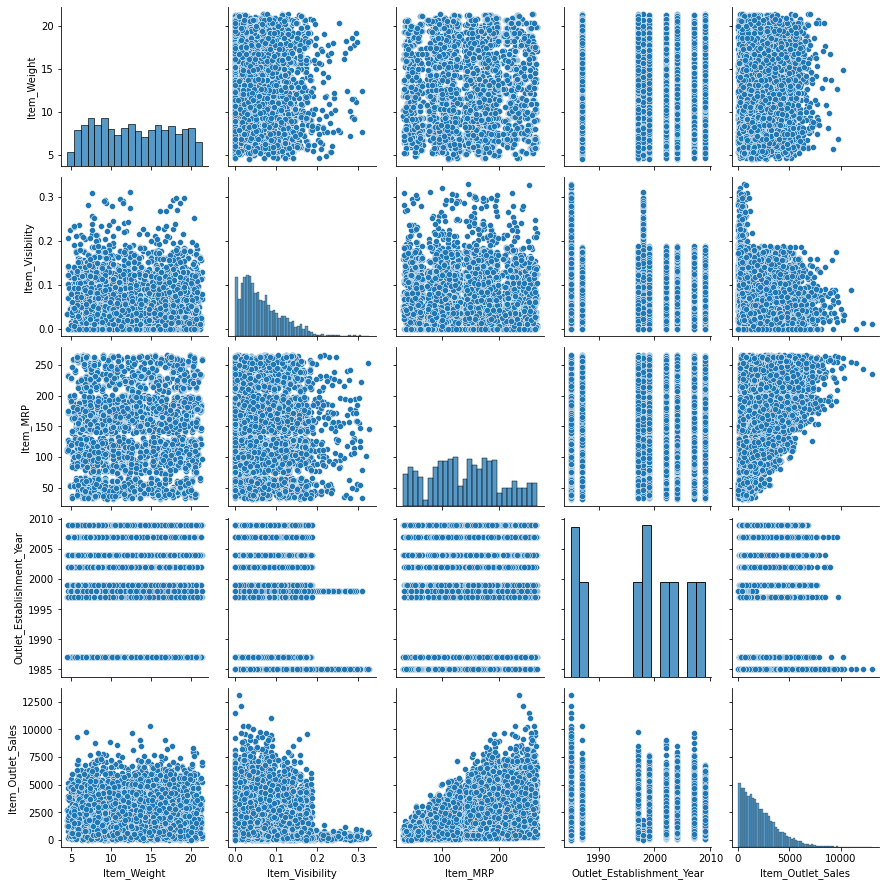

In [19]:
# plot the pairplot of the dataset
sns.pairplot(df)

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

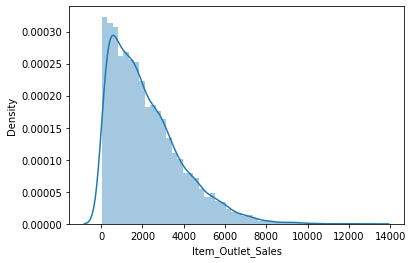

In [20]:
# plot the distribution plot of the dataset
sns.distplot(df['Item_Outlet_Sales'])

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

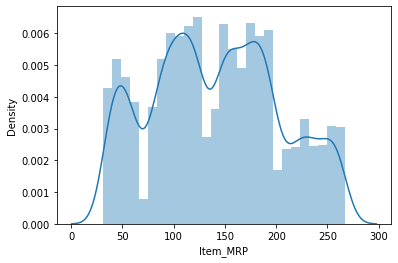

In [21]:
# distributin   plot of the dataset
sns.distplot(df['Item_MRP'])

In [22]:
# value counts of the product  identifier collumn
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCI54     9
FDQ40     9
FDU12     9
         ..
FDK57     1
FDT35     1
FDE52     1
FDC23     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [23]:
# value counts of the outlet identifier collumn
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

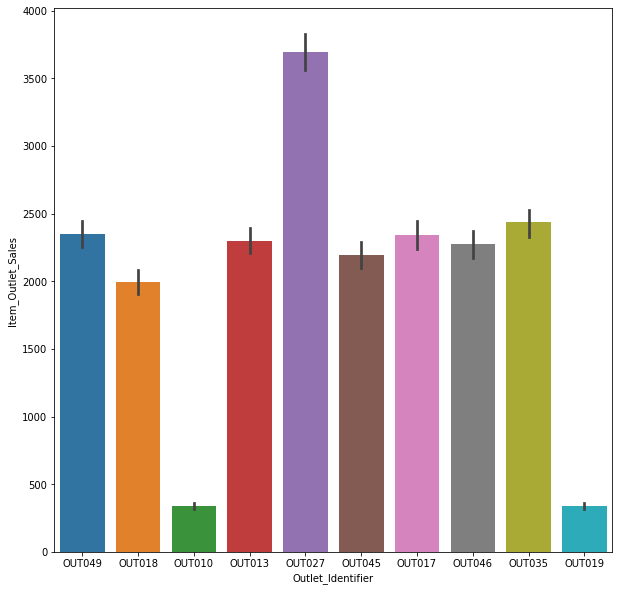

In [24]:
# comparing the outlet sales with the outlet identifier with figure size of 10,10
plt.figure(figsize=(10,10))
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

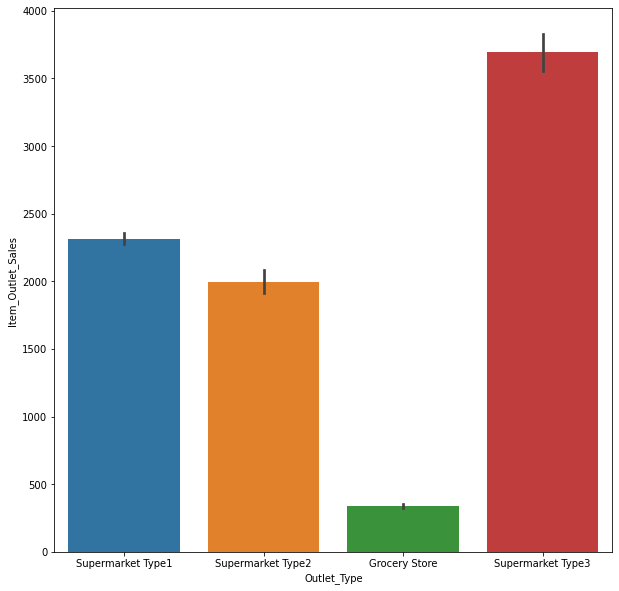

In [25]:
# comparing the outlet sales with the outlet type
plt.figure(figsize=(10,10))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

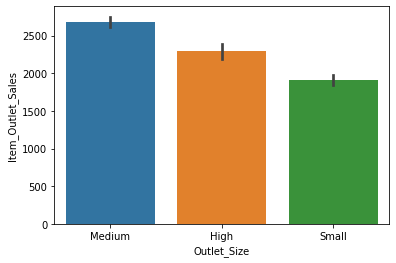

In [26]:
# comparing the outlet sales with the outlet size
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

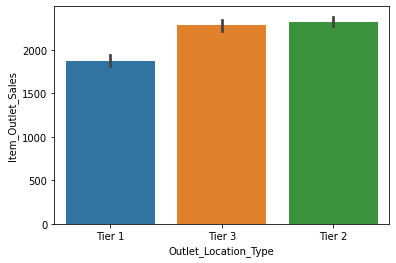

In [27]:
# comparing the outlet sales with the outlet location type
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

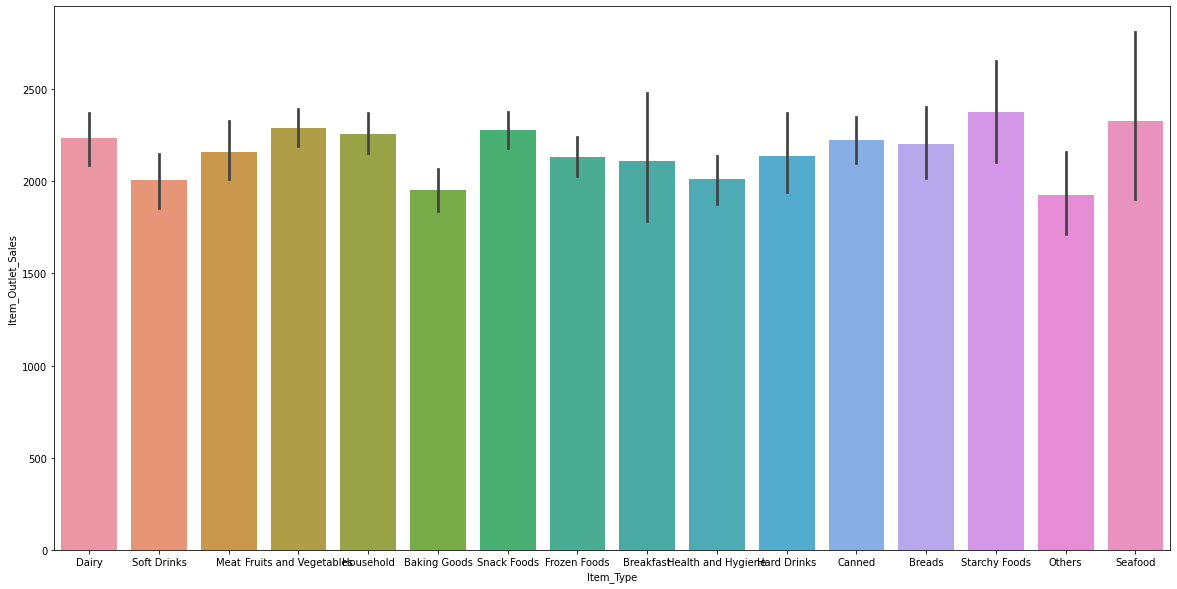

In [28]:
# comparing the outlet sales with the item type
plt.figure(figsize=(20,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

In [29]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

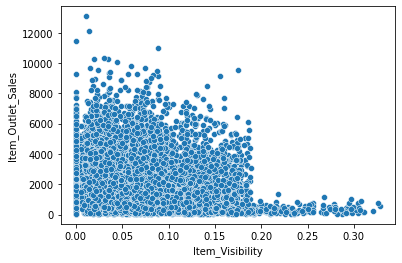

In [30]:
# comparison plot in between the item visibility and the item outlet sales
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

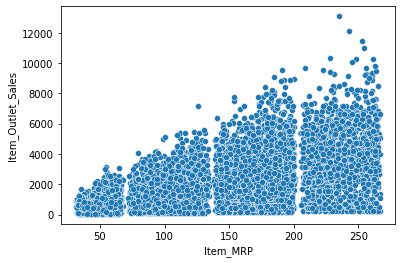

In [31]:
# comparison plot in between the item mrp and the item outlet sales
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

c:\Program Files\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_MRP'>

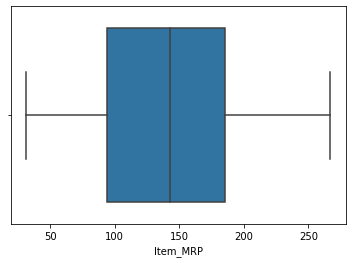

In [32]:
# plot the box plot of the item mrp
sns.boxplot(df['Item_MRP'])

In [33]:
# which item type has the highest mrp
df.groupby('Item_Type')['Item_MRP'].max()

Item_Type
Baking Goods             265.5568
Breads                   263.6594
Breakfast                234.9300
Canned                   266.8884
Dairy                    266.6884
Frozen Foods             264.8910
Fruits and Vegetables    264.2252
Hard Drinks              261.4278
Health and Hygiene       266.6884
Household                264.7910
Meat                     261.5936
Others                   254.9040
Seafood                  240.2880
Snack Foods              264.9568
Soft Drinks              263.5910
Starchy Foods            263.0252
Name: Item_MRP, dtype: float64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

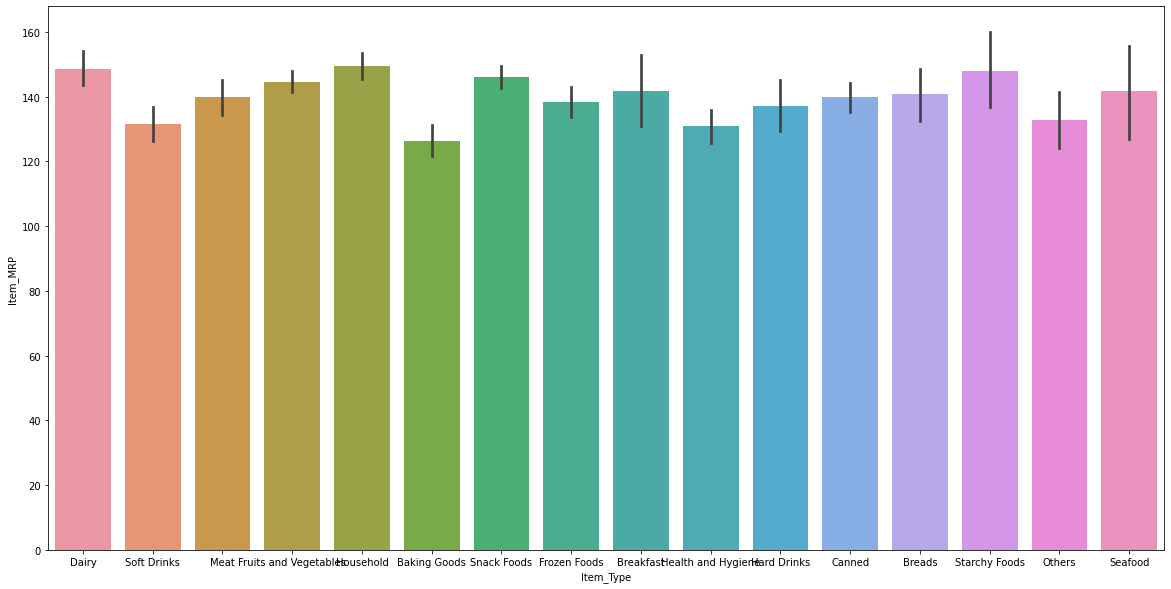

In [34]:
# plot the bar plot of the item type and the item mrp
plt.figure(figsize=(20,10))
sns.barplot(x='Item_Type',y='Item_MRP',data=df)

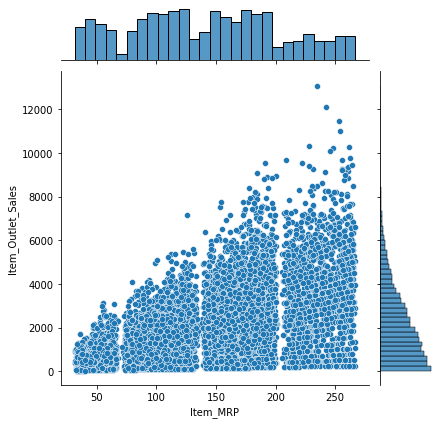

In [35]:
# joint plot of the item mrp and the item outlet sales
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

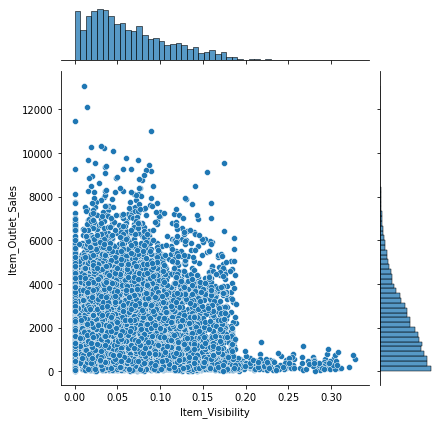

In [36]:
# joint plot of the item visibility and the item outlet sales
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

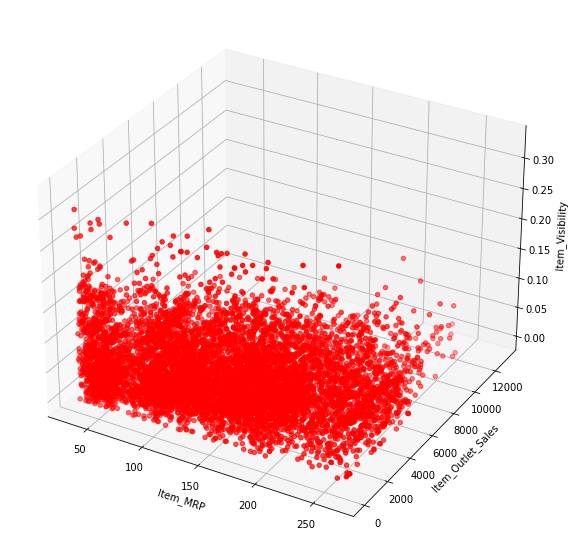

In [37]:
# 3d plot of the item mrp and the item outlet sales
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Item_MRP'],df['Item_Outlet_Sales'],df['Item_Visibility'],c='r',marker='o')
ax.set_xlabel('Item_MRP')
ax.set_ylabel('Item_Outlet_Sales')
ax.set_zlabel('Item_Visibility')
plt.show()


In [38]:
#  gif plot of the item mrp and the item outlet sales
import plotly.express as px
fig = px.scatter_3d(df, x='Item_MRP', y='Item_Outlet_Sales', z='Item_Visibility',
                color='Item_Type')
fig.show()

# **Data Preprocessing**

In [39]:
# column names of the dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [40]:
# printing the data type of the columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [41]:
# data head
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
# checking the  misssing values in the dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
# impute the msising values with the mean of the column
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True) 
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [44]:
# use label encoder to convert the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])

<AxesSubplot:>

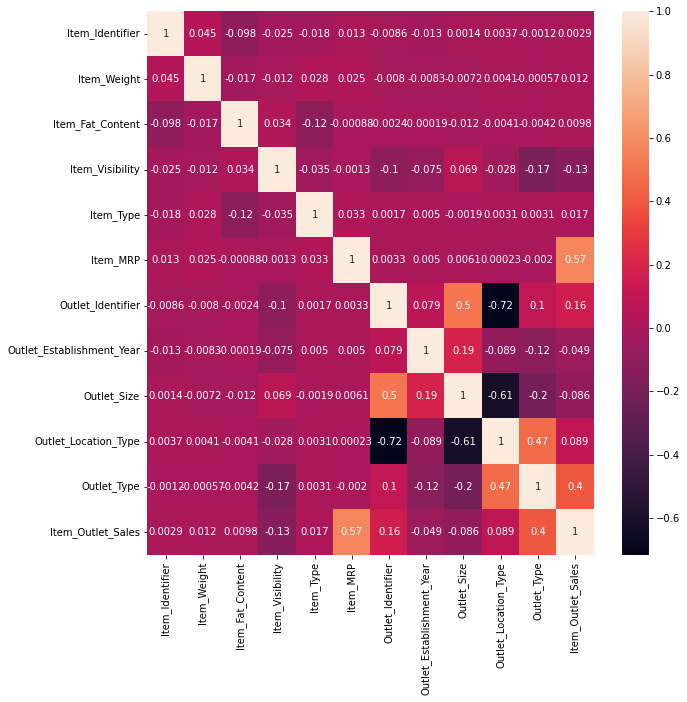

In [45]:
# plot the heatmap of the dataset with plot size 10,10
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

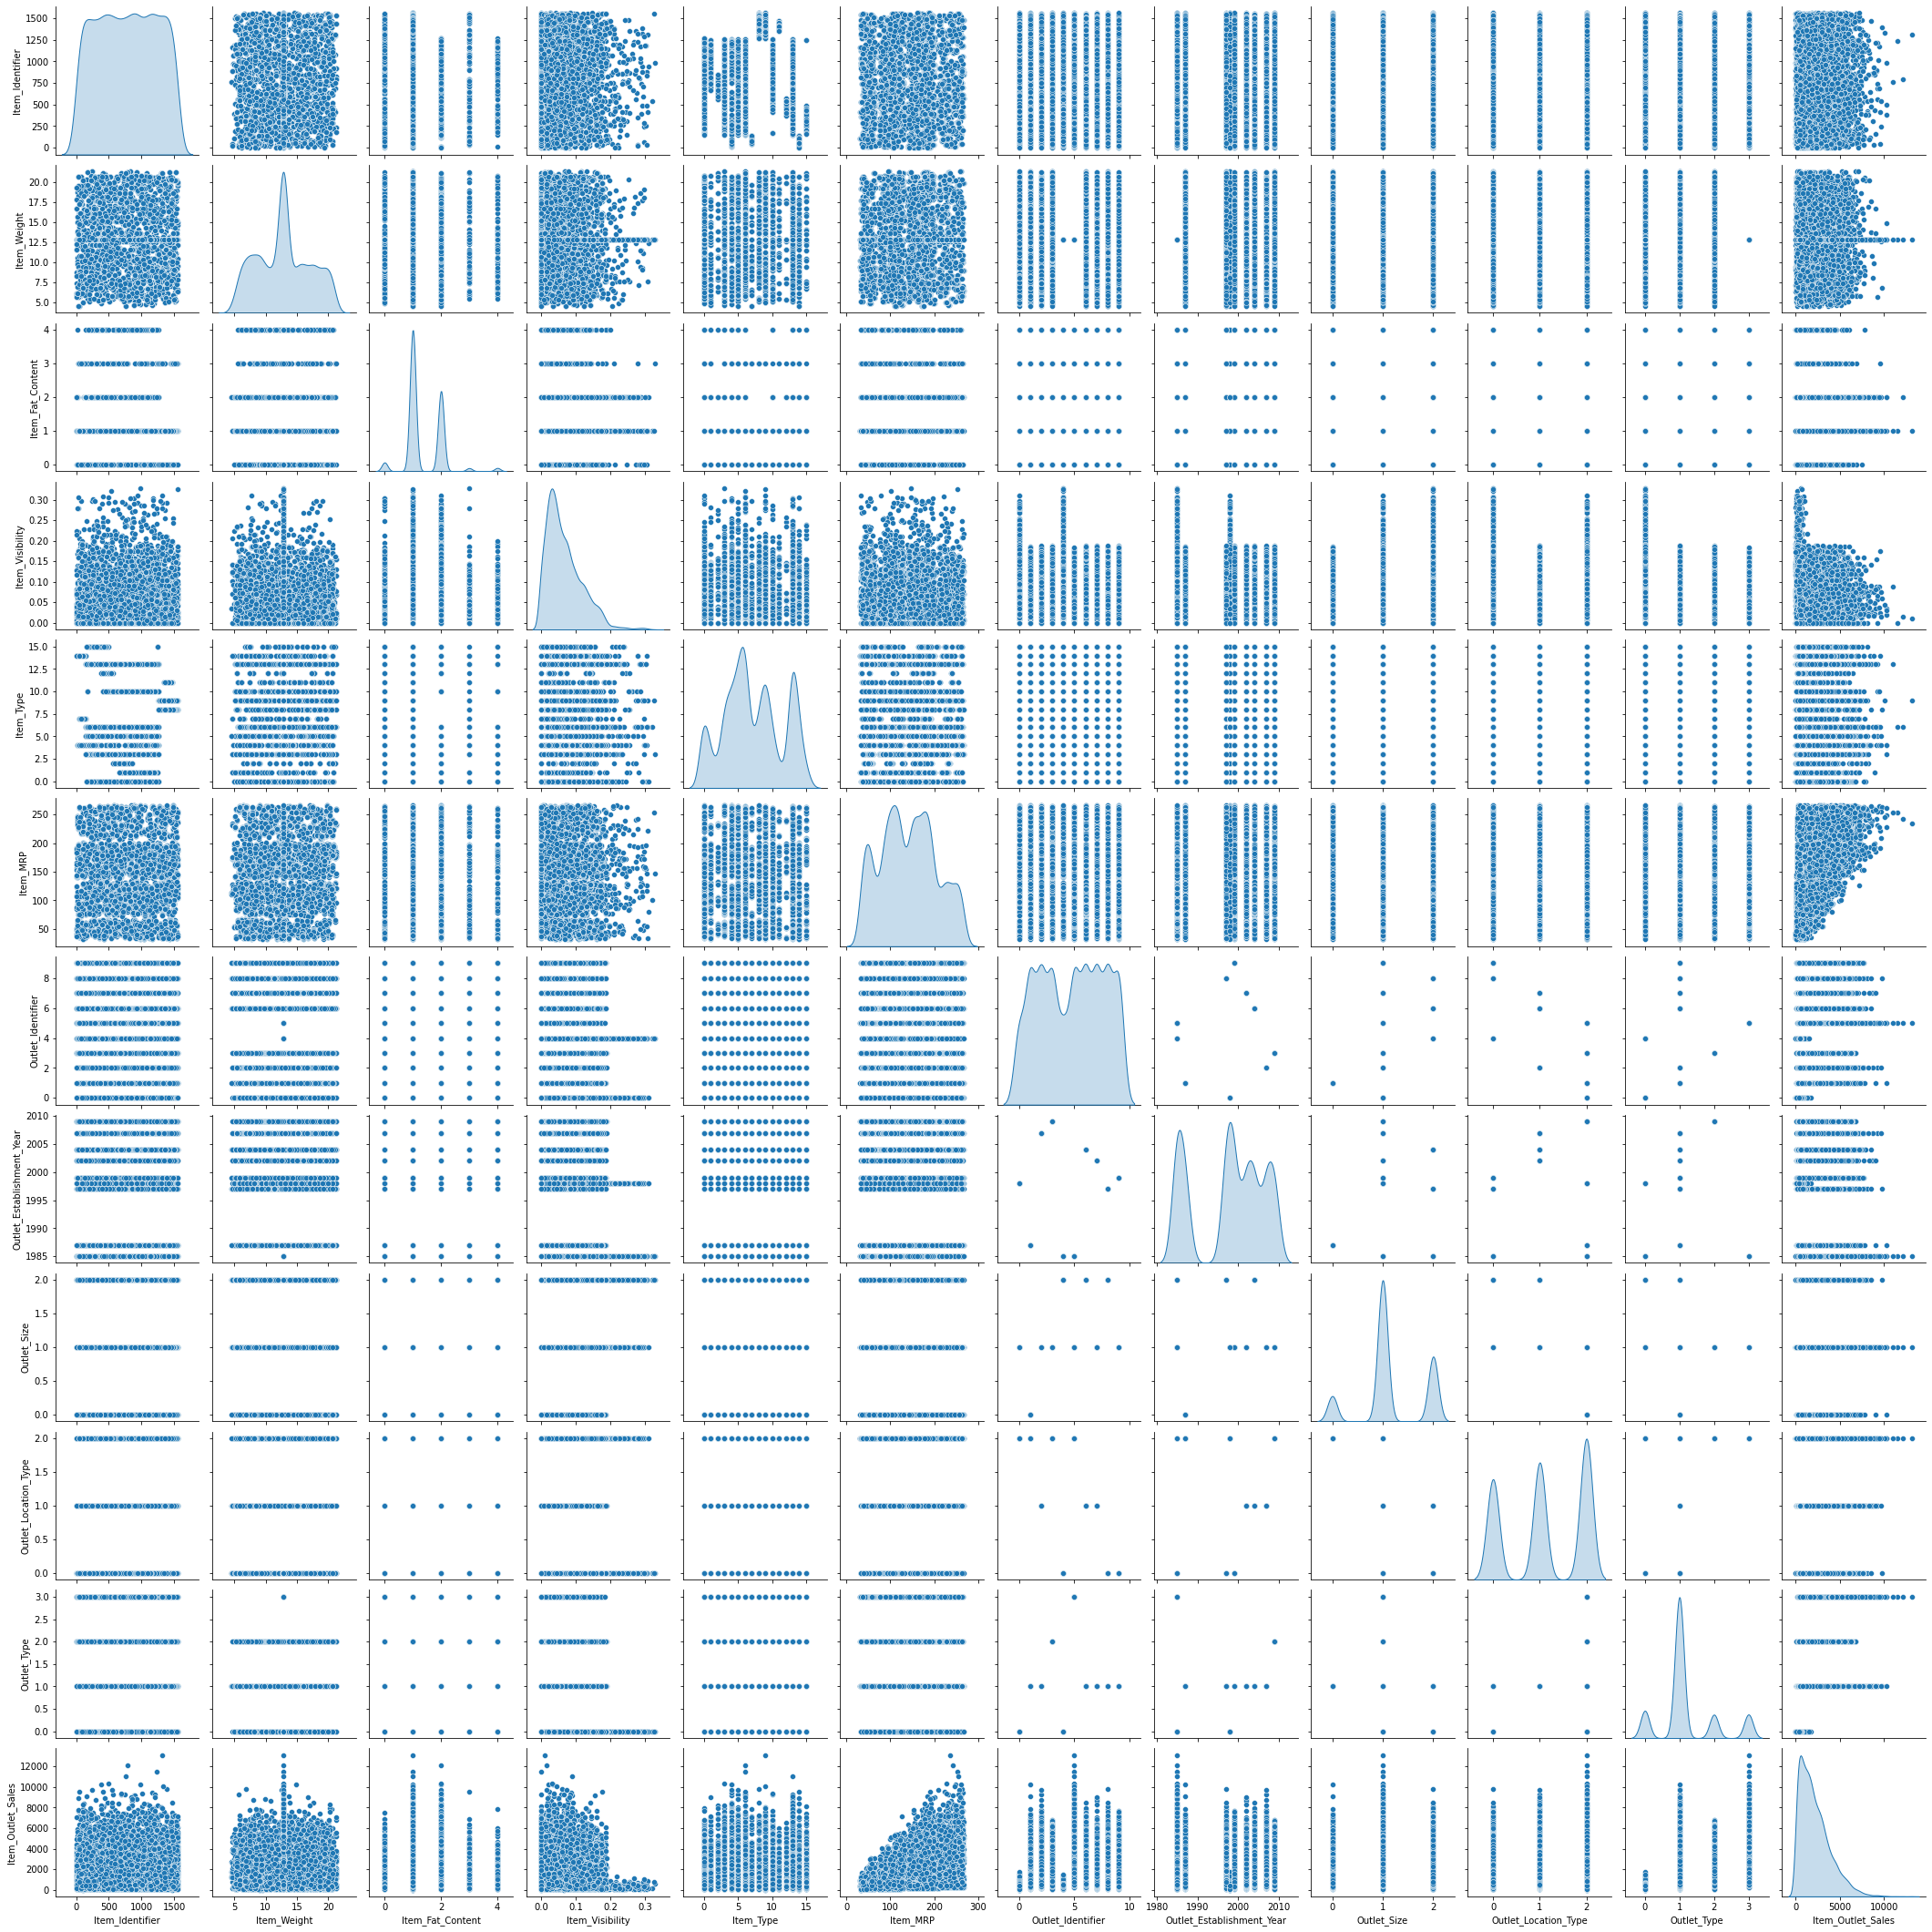

In [53]:
# plot the pairplot of the dataset
sns.pairplot(df,diag_kind='kde')

In [47]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [48]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [49]:
# split the dataset into x and y
x = df.drop(['Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

In [50]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [51]:
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,657,7.720000,2,0.147904,6,116.6466,0,1998,1,2,0
655,1360,19.750000,1,0.014301,9,103.0332,8,1997,2,0,1
2229,1204,12.857645,2,0.054221,1,129.1310,5,1985,1,2,3
2537,680,19.350000,1,0.118342,13,222.6088,7,2002,1,1,1
3528,1180,18.350000,2,0.092150,5,184.8266,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,1172,9.395000,2,0.286345,6,139.1838,0,1998,1,2,0
5191,263,15.600000,1,0.117575,5,75.6670,2,2007,1,1,1
5390,1464,17.600000,1,0.018944,8,237.3590,7,2002,1,1,1
860,609,20.350000,3,0.054363,13,117.9466,2,2007,1,1,1


In [52]:
y_train

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

# **Model Building**

## **Gradient Boosting Regressor**

In [54]:
# Bilding the gradient boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
# predicting the model
y_pred = gb.predict(x_test)
# evaluating the model
from sklearn.metrics import r2_score
gb_acc = r2_score(y_test,y_pred)
print(gb_acc)

0.5964083769778913


In [55]:
# calculating the evaluation errors 
from sklearn.metrics import mean_squared_error
gb_mse = mean_squared_error(y_test,y_pred)
gb_rmse = np.sqrt(gb_mse)
print(gb_rmse)

1063.2297605796323


In [56]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
gb_mae = mean_absolute_error(y_test,y_pred)
print(gb_mae)

740.9232029155582


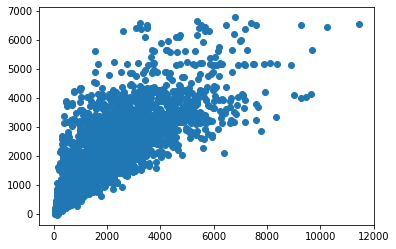

In [57]:
# plot the actual and predicted values
plt.scatter(y_test,y_pred)

## **Support Vector Regressor**

In [58]:
# build the support vector regressor model
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
# predicting the model
y_pred = svr.predict(x_test)
# evaluating the model
from sklearn.metrics import r2_score
svr_acc = r2_score(y_test,y_pred)
print(svr_acc)

-0.03168139571419282


In [59]:
# calculating the evaluation errors
from sklearn.metrics import mean_squared_error
svr_mse = mean_squared_error(y_test,y_pred)
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)

1699.9214428010089


In [60]:
# calculate the adjusted r2 score
from sklearn.metrics import r2_score
svr_adj_r2 = 1 - (1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(svr_adj_r2)

-0.036140529448124514


In [61]:
# calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
svr_mae = mean_absolute_error(y_test,y_pred)

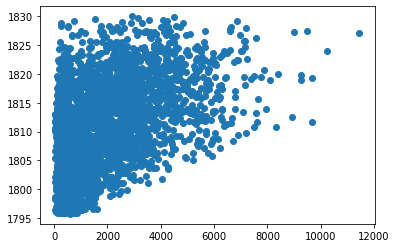

In [62]:
# plot the actual and predicted values
plt.scatter(y_test,y_pred)

# **Model comparison**

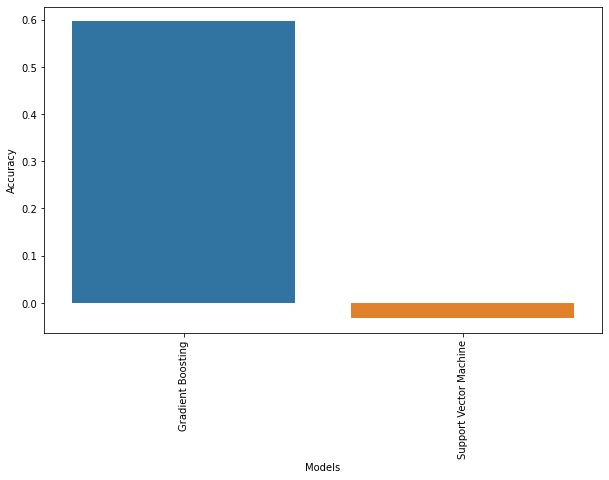

In [63]:
graph = pd.DataFrame({'Models':['Gradient Boosting','Support Vector Machine'],'Accuracy':[gb_acc,svr_acc]})
graph


plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()